<div class="alert alert-block alert-info"> <br>

#  <center> <b> Data Mining Project- ABCDEats Inc. </center> <br>
## <center> Clustering Models </center> <br>
### <center> Group 38 <center>

  <div>

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Inês Araújo       | 20240532@novaims.unl.pt      | 20240532   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Rafael Silva      | 20240511@novaims.unl.pt      | 20240511   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |

---

### **2. Clustering Techniques Notebook**
**Description:**
In this notebook, we will experiment with and evaluate various clustering techniques to uncover patterns and groupings within the data. The focus will be on the following methods:

- **Hierarchical Clustering:** Organizes the data into a hierarchy of clusters, providing insights into relationships at multiple levels of granularity.
- **K-Means Clustering:** Partitions the data into a predefined number of clusters (`k`), optimizing similarity within each group.
- **Self-Organizing Maps (SOMs):** Uses neural network-based methods to project high-dimensional data into a lower-dimensional map, revealing complex clustering patterns.

Key steps include:
- Loading the **dataset** for clustering analysis.
- Applying **preprocessing and normalization** to prepare the data for clustering.
- **Implementing clustering algorithms**: Experimenting with the three techniques mentioned above.
- **Visualization and evaluation:** Visualizing cluster formations and analyzing their quality using metrics such as Silhouette Score.
- **Comparison:** Comparing the strengths and limitations of each method.

This notebook serves as a foundational exploration of clustering methods, providing insights into how different techniques handle the same dataset.

---

## **Table of Contents** <br>

---

<div class="alert alert-block alert-success">
<a class="anchor" id="importlibraries">

# 1. Import Libraries
    
</a>
<div>

In [1]:
import pandas as pd  # Imports the pandas library, used for handling and analyzing structured data in tables (DataFrames).
import numpy as np  # Imports numpy, which is helpful for working with numerical data, especially for mathematical functions and arrays.
import matplotlib.pyplot as plt  # Imports matplotlib's pyplot module to create plots and charts for visualizing data.
import seaborn as sns  # Imports seaborn, a library built on matplotlib, for creating more advanced and visually appealing statistical graphics.
from math import ceil  # Imports the ceil function from the math library, which rounds numbers up to the nearest whole number.
from scipy.stats import f_oneway # Import the f_oneway function from SciPy for performing a one-way ANOVA test

# --
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from minisom import MiniSom 

sns.set()

<div class="alert alert-block alert-success">
<a class="anchor" id="importdataset">
    
# 2. Import dataset
    
</a>
<div>

In [2]:
df = pd.read_csv('Preprocessed_Data.csv', index_col='customer_id')

In [3]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes',
       ...
       'is_chain_6', 'is_chain_7', 'is_chain_8', 'is_chain_9',
       'is_chain_Other Chains', 'last_promo_DISCOUNT', 'last_promo_FREEBIE',
       'last_promo_NOPROMO', 'payment_method_CASH', 'payment_method_DIGI'],
      dtype='object', length=110)

In [4]:
df_clusters = df.copy()

In [5]:
cuisine_cols= df_clusters.columns[df_clusters.columns.str.contains('CUI_')].tolist()
# Create a list with variables referring to the hours of the day
hr_cols = df_clusters.columns[df_clusters.columns.str.contains('HR')].tolist()
# Create a list with variables referring to the days of the week
dow_cols = df_clusters.columns[df_clusters.columns.str.contains('DOW')].tolist()

In [6]:
df_clusters.drop(columns = hr_cols, inplace = True)
df_clusters.drop(columns = cuisine_cols, inplace = True)
df_clusters.drop(columns = dow_cols, inplace = True)

In [7]:
df_clusters.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'dif_order', 'tot_CUI', 'tot_work_days',
       'tot_leisure_days', 'total_products_by_week', 'total_products_by_day',
       'tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon',
       'tot_dinner', 'tot_late_night', 'tot_western_cuisines',
       'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines',
       'daily_consumption', 'customer_region_2440', 'customer_region_2490',
       'customer_region_4140', 'customer_region_4660', 'customer_region_8370',
       'customer_region_8550', 'customer_region_8670', 'is_chain_1',
       'is_chain_10', 'is_chain_11', 'is_chain_12', 'is_chain_13',
       'is_chain_14', 'is_chain_15', 'is_chain_16', 'is_chain_17',
       'is_chain_18', 'is_chain_19', 'is_chain_2', 'is_chain_20',
       'is_chain_21', 'is_chain_22', 'is_chain_23', 'is_chain_24',
       'is_chain_25', 'is_chain_26', 'is_chain_27', 'is_chain_28',
       'is_chain_

Before beginning the clustering process, we can reduce the dimensionality of the features by categorizing them into four main groups, each representing different aspects of customer information and behavior:

1. **Customer Profile (`Customer_perfil`)**  
   Describes the basic details and temporal purchase activity of the customer:  
   - `customer_age`: The age of the customer.  
   - `first_order`: The date of the customer's first order.  
   - `last_order`: The date of the customer's most recent order.  
   - `dif_order`: The time difference between the first and last order, indicating customer activity over time.

2. **Purchasing Patterns (`Purchasing_patterns`)**  
   Highlights the customer's ordering behavior on specific days:  
   - `tot_work_days`: Total number of orders placed on working days.  
   - `tot_leisure_days`: Total number of orders placed on leisure or non-working days.

3. **Customer Behavior (`Customer_behavior`)**  
   Analyzes the customer's activity based on time-of-day preferences:  
   - `tot_early_morning`: Orders placed in the early morning.  
   - `tot_breakfast`: Orders placed during breakfast hours.  
   - `tot_lunch`: Orders placed during lunch hours.  
   - `tot_afternoon`: Orders placed in the afternoon.  
   - `tot_dinner`: Orders placed during dinner hours.  
   - `tot_late_night`: Orders placed late at night.

4. **Culinary Preferences (`Culinary_preferences`)**  
   Focuses on the customer's choice of cuisines and overall culinary habits:  
   - `tot_western_cuisines`: Total orders of Western-style cuisines.  
   - `tot_oriental_cuisines`: Total orders of Oriental-style cuisines.  
   - `tot_other_cuisines`: Total orders of other styles of cuisines.  
   - `purchased_cuisines`: The specific cuisines purchased by the customer.  
   - `tot_CUI`: Total number of unique cuisines ordered by the customer.  


In [8]:
Customer_perfil = ['customer_age', 'first_order', 'last_order', 'dif_order']
Purchasing_patterns = ['tot_work_days', 'tot_leisure_days']
Customer_behavior = ['tot_early_morning', 'tot_breakfast','tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night']
Culinary_preferences = ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']

In [9]:
# Criar subsets para cada categoria
df_selected_1 = df[Customer_perfil]
df_selected_2 = df[Purchasing_patterns]
df_selected_3 = df[Customer_behavior]
df_selected_4 = df[Culinary_preferences]

<div class="alert alert-block alert-success">
<a class="anchor" id="section_3">
    
# 3. Hierarchical Clustering
    
</a>
<div>

To address the computational complexity associated with large datasets, we will implement a hybrid approach that combines K-Means and Hierarchical Clustering (HC). This strategy leverages the efficiency of K-Means and the precision of HC, resulting in a more effective and scalable analysis.

### $SS_{t},  SS_{w}, SS_{b}$

In [10]:
def get_sst(df_clusters, feats):
    """
    Calculate the sum of squares (SST) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_clusters_ = df_clusters[feats]
    sst = np.sum(df_clusters_.var() * (df_clusters_.count() - 1))
    
    return sst 




def get_ssb(df_clusters, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df_clusters[label_col]):
        df_clusters_ = df_clusters.loc[:, feats]
        X_ = df_clusters_.values
        X_k = df_clusters_.loc[df_clusters[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df_clusters, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df_clusters (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_clusters_k = df_clusters[feats_label].groupby(by=label_col).apply(lambda col: get_sst(col, feats), 
                                                       include_groups=False)

    return df_clusters_k.sum()

In [11]:
# df_clusters_sst_ = get_sst(df_clusters_concat, metric_features)
# df_clusters_ssb_ = get_ssb(df_clusters_concat, metric_features, 'labels')
# df_clusters_ssw_ = get_ssw(df_clusters_concat, metric_features, 'labels')

# print("SSb:  ", df_clusters_ssb_)
# print("SSw:  ", df_clusters_ssw_)
# print("SSt:  ", df_clusters_sst_)
# print("SSt == SSb+SSw ? ", (df_clusters_sst_ == df_clusters_ssb_ + df_clusters_ssw_))


### $R^2$

In [12]:

def get_rsq(df_clusters, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df_clusters (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_clusters_sst_ = get_sst(df_clusters, feats)                 # get total sum of squares
    df_clusters_ssw_ = get_ssw(df_clusters, feats, label_col)     # get ss within
    df_clusters_ssb_ = df_clusters_sst_ - df_clusters_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_clusters_ssb_/df_clusters_sst_)

In [13]:
def get_r2_hc(df_clusters, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df_clusters (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = df_clusters.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df_clusters) 
        
        # concat df_clusters with labels
        df_clusters_concat = pd.concat([df_clusters, pd.Series(hclabels, name='labels', index=df_clusters.index)], axis=1)  
        
        
        # append the R2 of the given cluster solution
        r2.append(get_rsq(df_clusters_concat, feats, 'labels'))
        
    return np.array(r2)

<a class="anchor" id="section_3_1">
    
## 3.1  Customer Perfil Perspective
    
</a>

In [14]:
def inertia(df, start, end , step ):
    k_values = range(start, end, step)
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_selected_1)  # X é o seu conjunto de dados
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
    plt.title('Inércia do K-Means para diferentes valores de k')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inércia')
    plt.grid(True)
    plt.show()

In [15]:
unique_points = pd.DataFrame(df_selected_1).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")


Maximum number of possible clusters: 21123


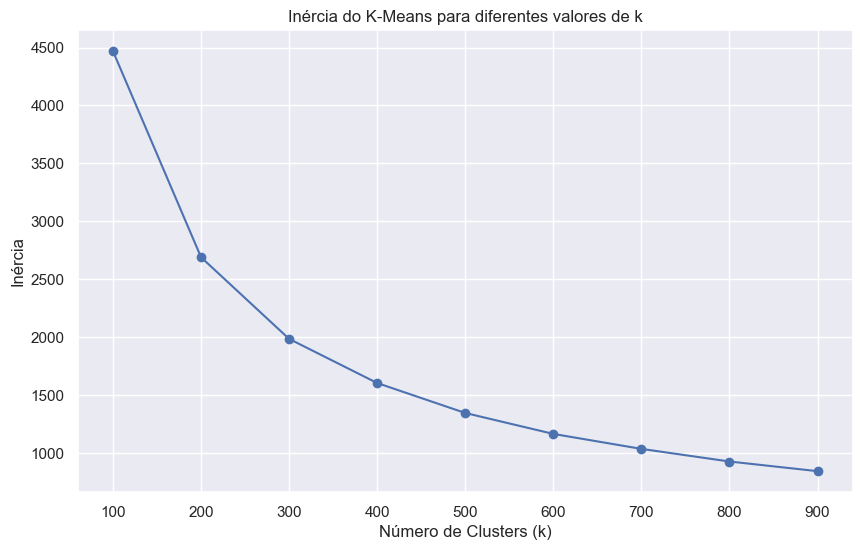

In [16]:
inertia(df_selected_1, 100, end=1000, step=100)

In [17]:
'''
Initialize the KMeans algorithm with the specified parameters
- n_clusters: The number of clusters to form 
- init: 'k-means++' to optimize initial cluster center selection and improve convergence
- n_init: The number of times the algorithm will run with different centroid seeds
- random_state: Ensures reproducibility of the clustering results
'''
kmeans = KMeans(n_clusters=400, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_1)  
clust_centers = kmeans.cluster_centers_

km_prefil=df_selected_1.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_prefil['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_prefil = km_prefil.groupby("kmeans_labels").mean()

In [18]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_prefil, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


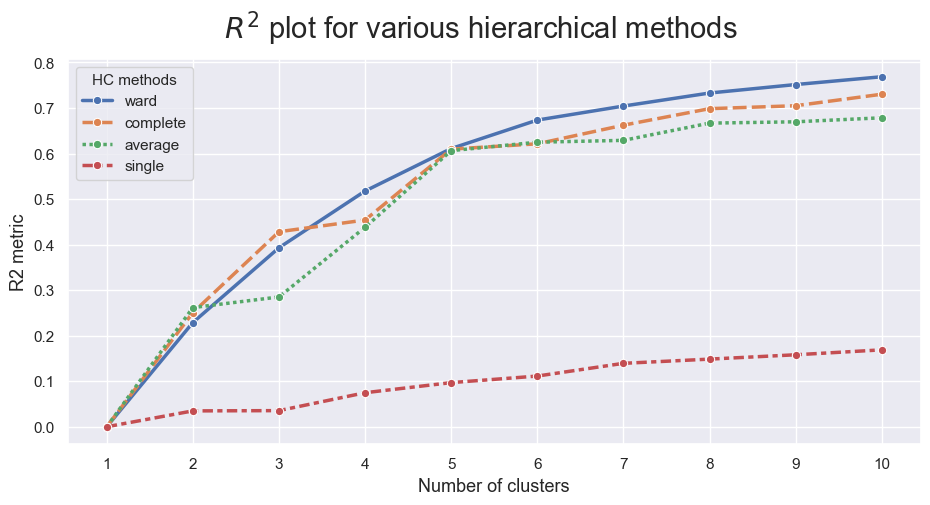

In [19]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

- Ward presents the highest R2 for any number of clusters, indicating that it best explains the variation in the data. It is ideal for forming compact, well-separated clusters.
- When looking at the graphs, the "elbow" of the curve occurs in 3 clusters, regardless of the method used.

### Defining the number of clusters:

In [20]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_prefil)

array([321, 288, 316, 221, 341, 379, 356, 225, 373, 354, 279, 249, 398,
       353, 351, 382, 358, 261, 297, 355, 364, 211, 207, 230, 303, 328,
       396, 360, 258, 394, 322, 347, 385, 395, 294, 255, 244, 232, 251,
       348, 329, 222, 352, 318, 285, 231, 268, 306, 254, 290, 265, 301,
       269, 267, 273, 295, 286, 381, 343, 299, 213, 330, 309, 383, 366,
       331, 327, 293, 223, 392, 235, 357, 201, 256, 197, 335, 271, 315,
       337, 177, 229, 332, 300, 386, 224, 277, 391, 338, 324, 264, 240,
       305, 369, 361, 239, 278, 362, 214, 399, 323, 367, 238, 260, 393,
       349, 272, 274, 236, 161, 374, 199, 292, 217, 311, 247, 263, 165,
       241, 376, 345, 250, 138, 384, 388, 220, 215, 218, 370, 257, 302,
       375, 203, 133, 377, 187, 387, 152, 344, 164, 270, 206, 110, 378,
       173, 289, 372, 237, 275, 296, 212, 325, 210, 346, 186, 208, 397,
       281, 136, 216, 198, 333, 284, 259, 262, 234, 359, 334, 253, 390,
       168, 368, 202, 280, 304, 336, 151, 339, 317, 219, 103, 27

In [21]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

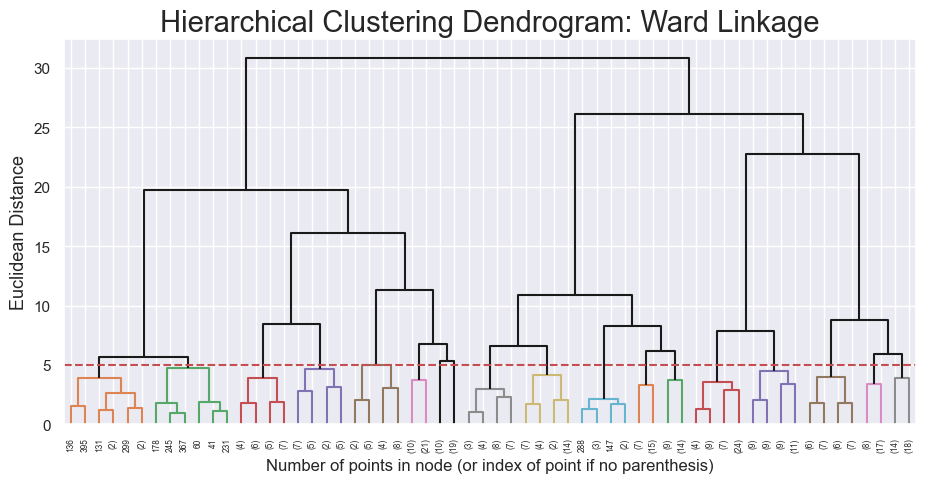

In [22]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

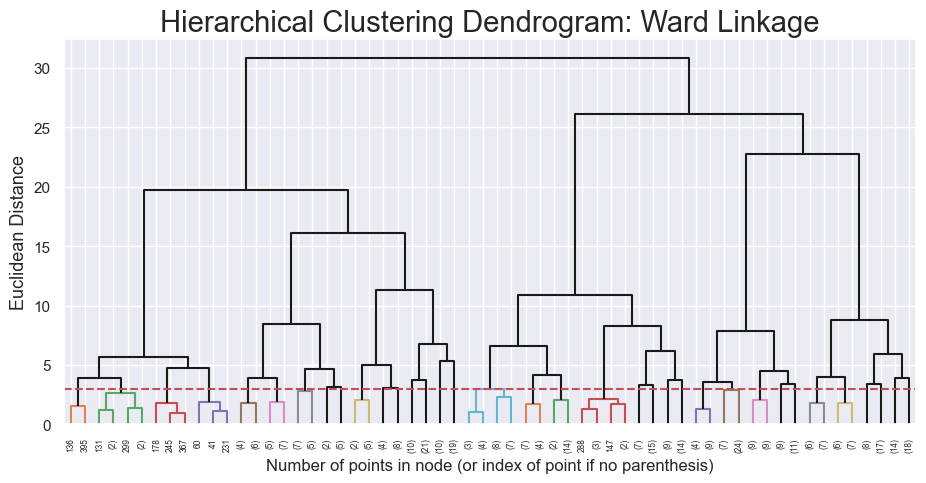

In [23]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [24]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_prefil)

In [25]:
df_clusters_concat = pd.concat([df_selected_1, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,customer_age,first_order,last_order,dif_order
KM_labels,,,,
0,-0.882640,1.721400,0.945085,-0.667484
1,-0.676763,-0.717265,-0.754555,-0.010212
2,0.224088,0.197742,0.964908,0.607751
3,1.398709,-0.423087,-0.509176,-0.057250
4,-0.193048,-0.653107,0.656333,1.064401
...,...,...,...,...
395,6.998489,-0.151793,-1.011143,-0.682683
396,-0.211578,-0.981176,0.802098,1.452070
397,-1.074141,-0.312780,0.224018,0.437575


In [26]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_perfil3 = df_clusters_concat.merge(pd.concat((km_prefil, pd.Series(hc3_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')
kmhc_perfil3.rename(columns={0:'HC_label'},inplace=True)

In [27]:
kmhc_perfil3.drop(columns='KM_labels').groupby('HC_label').mean()

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,-0.492437,0.228121,0.411734,0.140520
1,1.138415,-0.019787,0.482106,0.401675
2,0.034752,-0.537547,-1.502176,-0.756290


In [28]:
n_clusters= 4

hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_prefil)

In [29]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_perfil4 = df_clusters_concat.merge(pd.concat((km_prefil, pd.Series(hc4_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')
kmhc_perfil4.rename(columns={0:'HC_label'},inplace=True)

In [30]:
kmhc_perfil4.drop(columns='KM_labels').groupby('HC_label').mean()

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,1.138415,-0.019787,0.482106,0.401675
1,-0.405883,1.264963,0.195549,-0.889274
2,0.034752,-0.537547,-1.502176,-0.756290
3,-0.564322,-0.632994,0.591279,0.995782


In [31]:
## See crosstab 

pd.crosstab(kmhc_perfil4['HC_label'], kmhc_perfil3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,0,7146,0
1,7718,0,0
2,0,0,6956
3,9293,0,0


The cluster 0 of `kmhc_perfil4` corresponds to cluster 1 of `kmhc_perfil3`, and cluster 2 of `kmhc_perfil4` corresponds to cluster 2 of `kmhc_perfil3`. Cluster 0 of `kmhc_perfil3` is divided between clusters 1 and 3 of `kmhc_perfil4`.


Based on the analysis of R2, dendrograms, and the crosstab matrix, we conclude that the optimal number of clusters is 3.

### Final Hierarchical clustering solution

In [32]:
kmhc_perfil_final= kmhc_perfil3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_perfil_final

,customer_age,first_order,last_order,dif_order
HC_label,,,,
0,-0.492437,0.228121,0.411734,0.140520
1,1.138415,-0.019787,0.482106,0.401675
2,0.034752,-0.537547,-1.502176,-0.756290


The variable  `customer_age` exhibits minimal variation across clusters (with mean values ranging from 0.189 to 0.194), indicating that age does not play a significant role in differentiating the identified groups.

- Cluster 0: A group of highly loyal and recurrent customers, with a long history of purchases that began at the start of the analyzed period and who remain active until the end.
- Cluster 1: Comprised of customers who made their first purchase during an intermediate period and exhibit a small difference between the time of their first and last purchases, suggesting low recurrence.
- Cluster 2: Includes customers who made purchases early in the analyzed period but are no longer active, displaying low loyalty and recurrence.

<a class="anchor" id="section_3_2">
    
## 3.2  Purchasing Patterns Perspective
    
</a>

In [33]:
unique_points = pd.DataFrame(df_selected_2).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 309


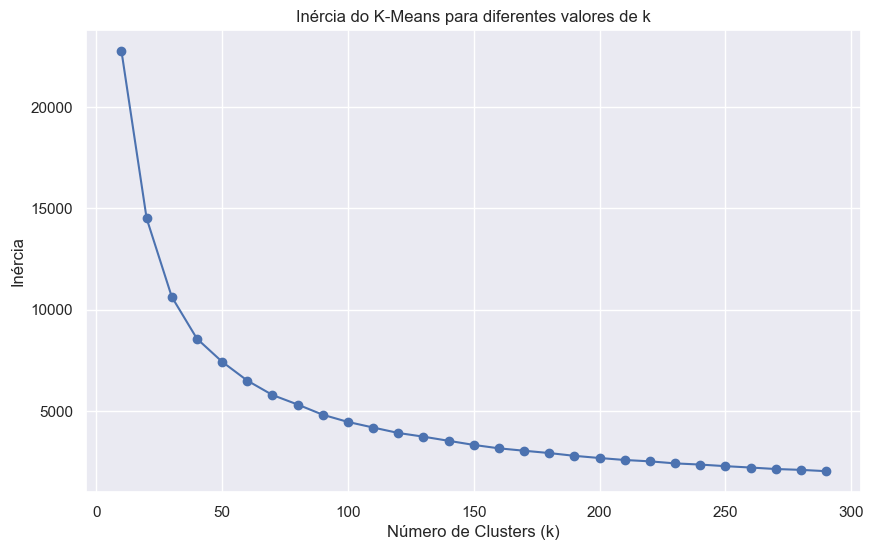

In [34]:
inertia(df_selected_2, start=10, end=300, step= 10)

In [35]:
kmeans = KMeans(n_clusters=50, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_2)  
clust_centers = kmeans.cluster_centers_

km_purchasing=df_selected_2.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_purchasing['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_purchasing = km_purchasing.groupby("kmeans_labels").mean()

In [36]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_purchasing, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


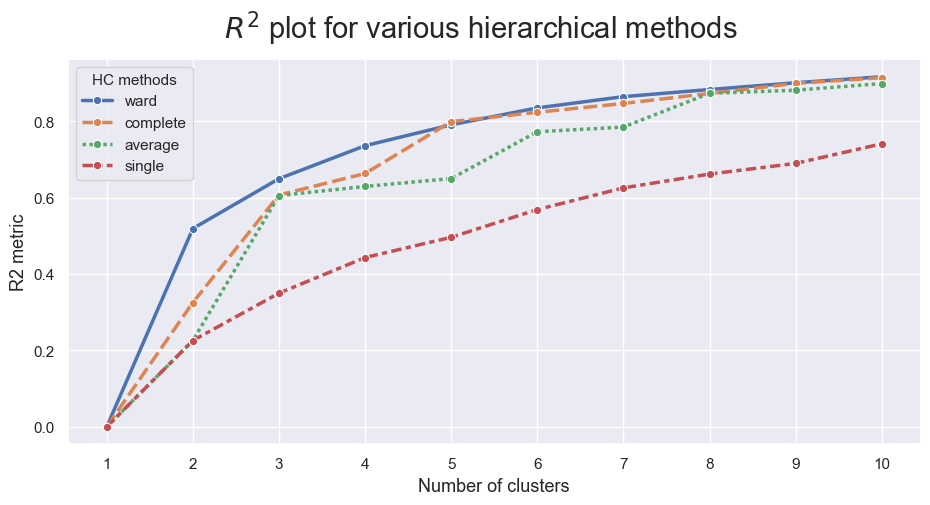

In [37]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

Despite the competitiveness between the Ward and Complete methods, the Ward method demonstrates superior performance. The optimal number of clusters appears to range from 2 to 4

### Defining the number of clusters:

In [38]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_purchasing)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


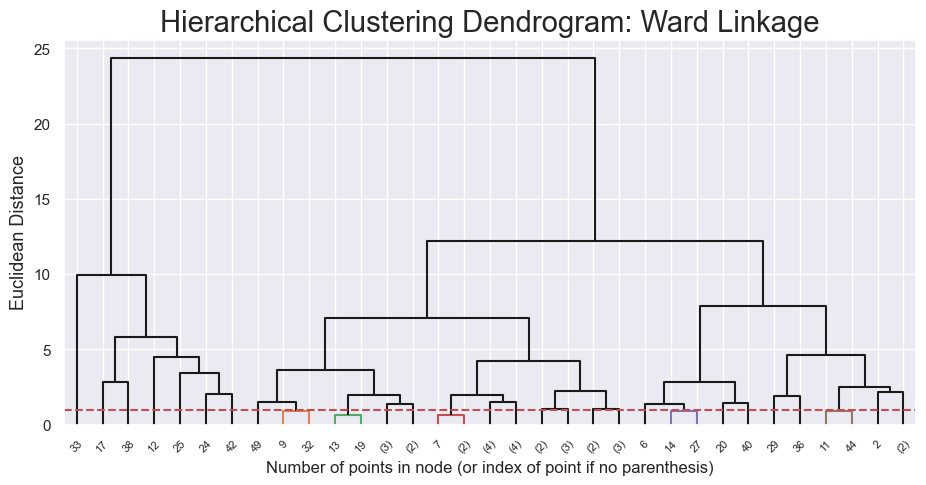

In [39]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 1
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [40]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 2

hc2_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc2_labels = hc2_clust.fit_predict(km_purchasing)


In [41]:
df_clusters_concat = pd.concat([df_selected_2, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_work_days,tot_leisure_days
KM_labels,,
0,-0.082406,-0.374151
1,0.960738,1.274554
2,2.573967,4.268416
3,3.629737,2.067979
4,-0.487959,0.137427
5,0.864488,-0.374151
6,-0.649406,1.836712
7,-0.503020,-0.885728
8,-0.893513,-0.374151


In [42]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing2 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc2_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')
kmhc_purchasing2.rename(columns={0:'HC_label'},inplace=True)

In [43]:
kmhc_purchasing2.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_work_days,tot_leisure_days
HC_label,,
0,-0.025713,-0.030316
1,4.764804,5.617740


In [44]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_purchasing)

In [45]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing3 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc3_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')
kmhc_purchasing3.rename(columns={0:'HC_label'},inplace=True)

In [46]:
kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_work_days,tot_leisure_days
HC_label,,
0,4.764804,5.617740
1,1.473101,2.487609
2,-0.119917,-0.188573


In [47]:
# See crosstab 

pd.crosstab(kmhc_purchasing2['HC_label'], kmhc_purchasing3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,0,1830,29116
1,167,0,0


### Final Hierarchical clustering solution

Despite the "biggest jump" in the dendrograms being for k=2, we decided to maintain 3 clusters since a group emerges that has a value of orders on weekdays much higher than the number of orders made on leisure days

In [48]:
kmhc_purchasing_final= kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_purchasing_final

,tot_work_days,tot_leisure_days
HC_label,,
0,4.764804,5.617740
1,1.473101,2.487609
2,-0.119917,-0.188573


CONCLUSIONS:
- Cluster 0: Represents a group that demonstrates a balanced purchasing behavior for food on both workdays and leisure days, with a slight preference for purchasing on workdays.
- Cluster 1: Characterized by extremely low values for both indicators, suggesting a group that is largely inactive or minimally engaged in food purchasing activities.
- Cluster 2: Displays moderately low purchasing activity on workdays and very low activity on leisure days, indicating a tendency to prioritize food purchases primarily on workdays.

<a class="anchor" id="section_3_3">
    
## 3.3   Customer Behavior Perspective
    
</a>

In [49]:
unique_points = pd.DataFrame(df_selected_3).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 3434


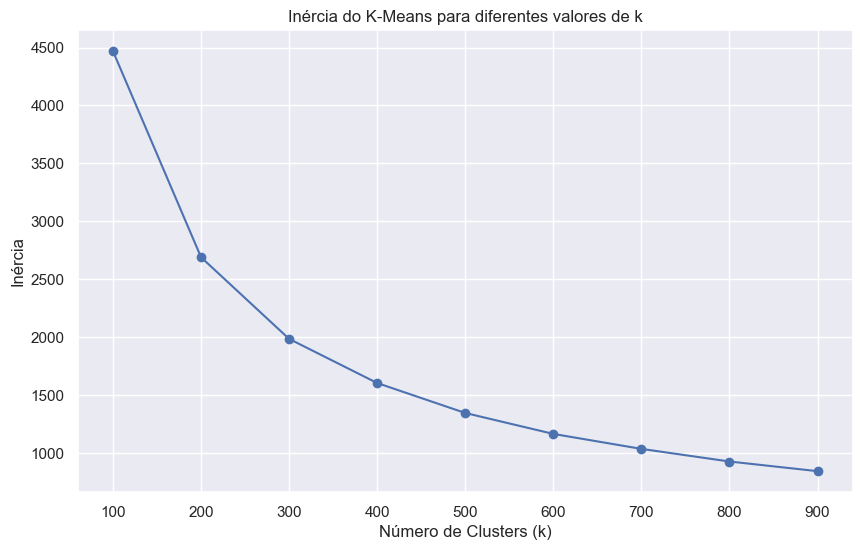

In [50]:
inertia(df_selected_3, 100, end=1000, step=100)

In [51]:
kmeans = KMeans(n_clusters=300, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_1), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_3)  
clust_centers = kmeans.cluster_centers_

km_customer=df_selected_3.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_customer['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_customer = km_customer.groupby("kmeans_labels").mean()

In [52]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_customer, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


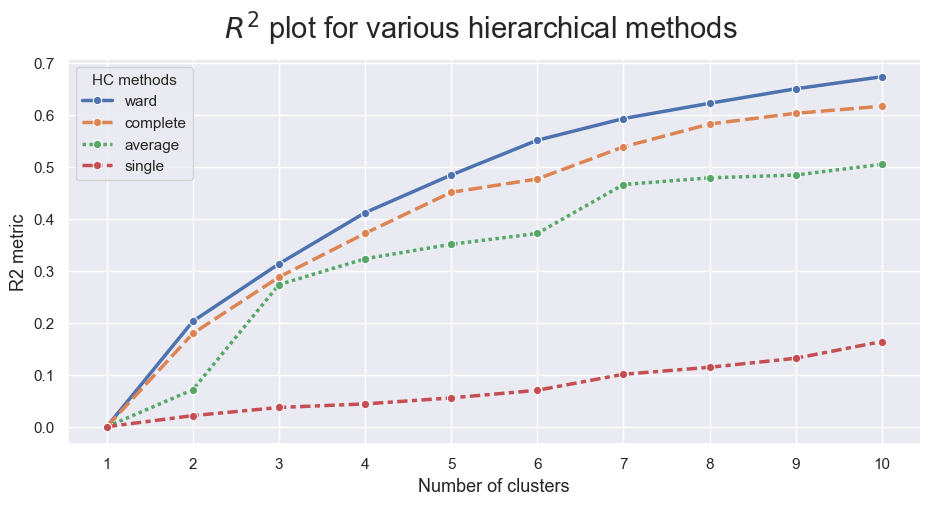

In [53]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

The optimal number of clusters appears to be 3, determined using the Ward method, for the same reasons as in previous analyses.

### Defining the number of clusters:

In [54]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_customer)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


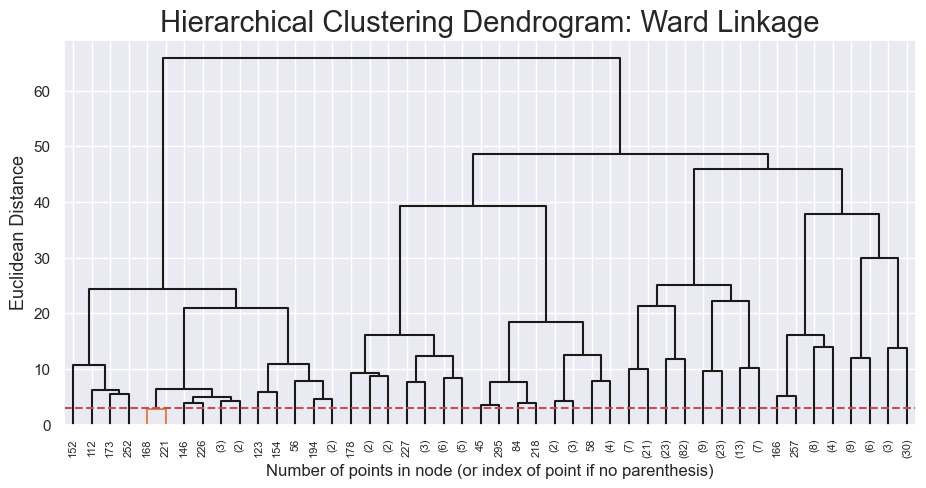

In [55]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

The ideal number of clusters seems to be 3, as it maintains a significant separation between the groups without compromising the quality of the segmentation.

### Final Hierarchical clustering solution

In [56]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_customer)

# Characterizing the 3 clusters
df_clusters_concat = pd.concat([df_selected_3, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
KM_labels,,,,,,
0,-0.366718,-0.511922,-0.628917,0.655902,-0.483958,-0.211723
1,-0.373490,0.894195,0.848612,-0.442916,-0.385339,-0.211723
2,-0.373490,-0.410071,0.186965,-0.358669,2.319633,-0.211723
3,2.354300,-0.511922,-0.565160,-0.559427,-0.459996,-0.211723
4,-0.373490,-0.511922,-0.628917,-0.572552,0.216940,-0.211723
...,...,...,...,...,...,...
295,15.083982,-0.511922,-0.318105,-0.418995,-0.483958,0.438942
296,1.354110,1.501152,1.857580,0.471634,-0.413868,2.390939
297,0.535773,1.501152,0.166762,-0.498845,-0.455922,-0.211723


In [57]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_customer = df_clusters_concat.merge(pd.concat((km_customer, pd.Series(hc4_labels)), axis=1).iloc[:,6], left_on='KM_labels',right_index=True, how='left')
kmhc_customer.rename(columns={0:'HC_label'},inplace=True)

In [58]:
kmhc_customer.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
HC_label,,,,,,
0,0.172239,0.157631,-0.106147,-0.091278,-0.085756,-0.032904
1,0.025462,0.013545,-0.009827,0.101877,0.214678,0.101728
2,-0.073347,-0.100061,0.013410,0.025176,-0.074961,-0.014776
3,-0.173735,-0.103684,0.146605,0.006757,0.037585,-0.022869


- Cluster 0: Primarily represents customers who place the majority of their orders during lunch and dinner.
- Cluster 1: Characterizes customers who make most of their orders during lunch and the afternoon, with few orders placed during the late night.
- Cluster 2: Includes customers who focus their orders primarily during lunch, with very little activity during the early morning or late-night hours.
- Cluster 3: Mainly represents individuals who place orders in the early morning hours.
Additionally, it was observed that the average consumption during breakfast is not significantly different across the clusters.

<a class="anchor" id="section_3_4">
    
## 3.4   Culinary Preferences Perspective
    
</a>

In [59]:
unique_points = pd.DataFrame(df_selected_4).drop_duplicates().shape[0]
print(f"Maximum number of possible clusters: {unique_points}")

Maximum number of possible clusters: 26140


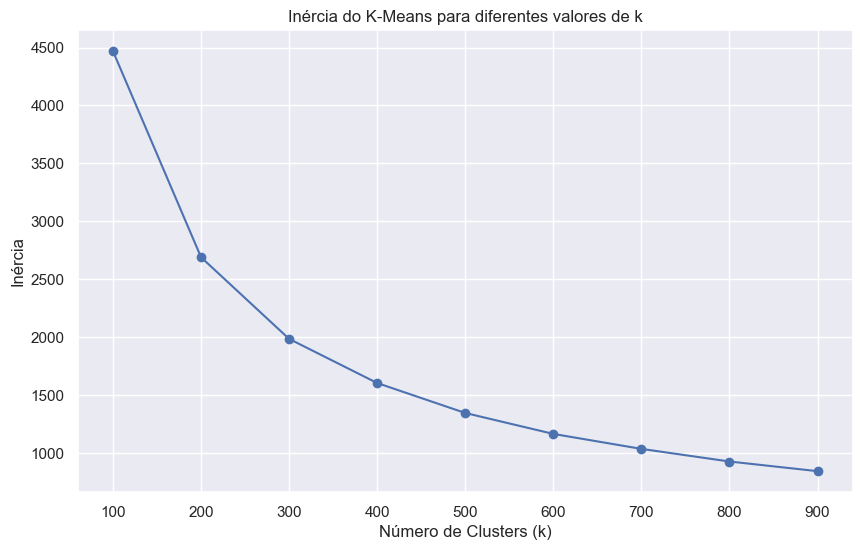

In [60]:
inertia(df_selected_4, 100, end=1000, step=100)

In [61]:
kmeans = KMeans(n_clusters=400, init='k-means++',n_init=15,random_state=42)

# Fit the KMeans algorithm to the data (df_selected_4), predict cluster labels and extract the cluster centers 
km_labels = kmeans.fit_predict(df_selected_4) 
clust_centers = kmeans.cluster_centers_

km_culinary=df_selected_4.copy()
# Add a new column to the copied DataFrame containing the cluster labels (0- 199)
km_culinary['kmeans_labels']= km_labels
# Group by the 'kmeans_labels' column and calculate the mean for each cluster
km_culinary = km_culinary.groupby("kmeans_labels").mean()

In [62]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(km_culinary, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


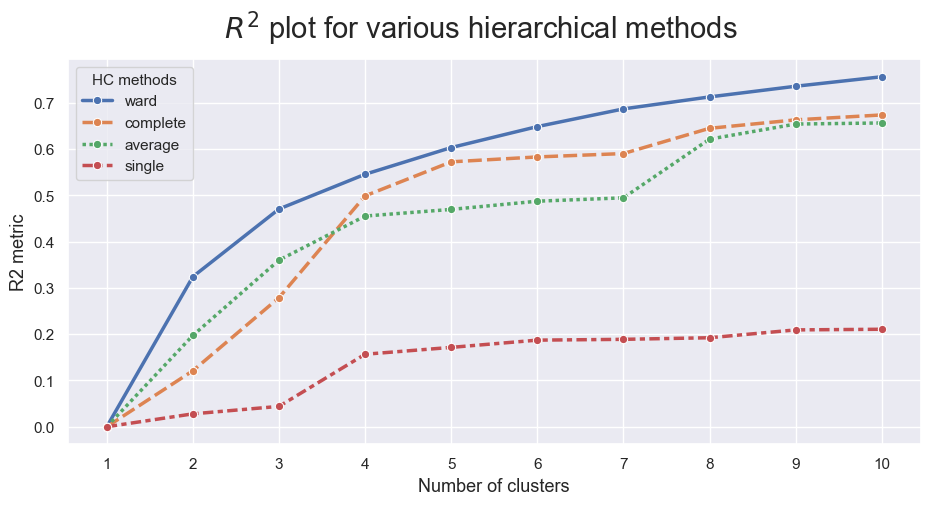

In [63]:
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

The optimal number of clusters appears to be 3 or 4, determined using the Ward method, for the same reasons as in previous analyses.

### Defining the number of clusters:

In [64]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_culinary)


# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


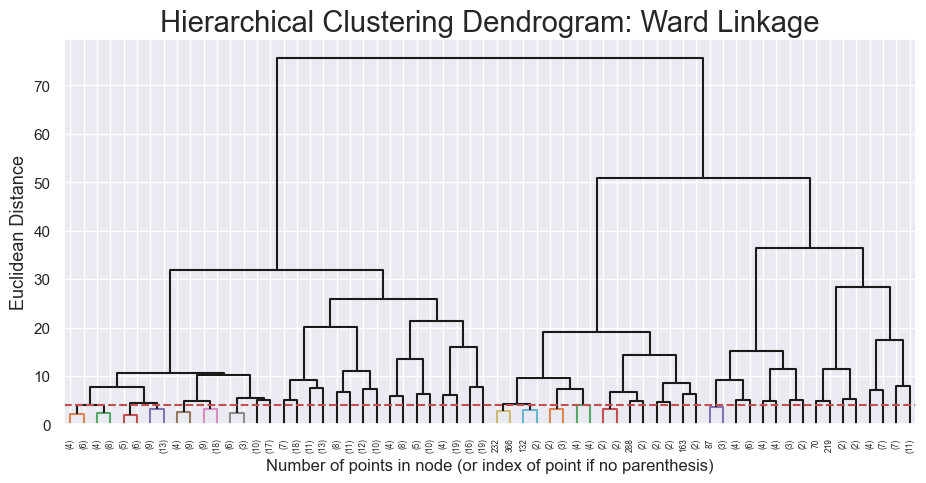

In [65]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

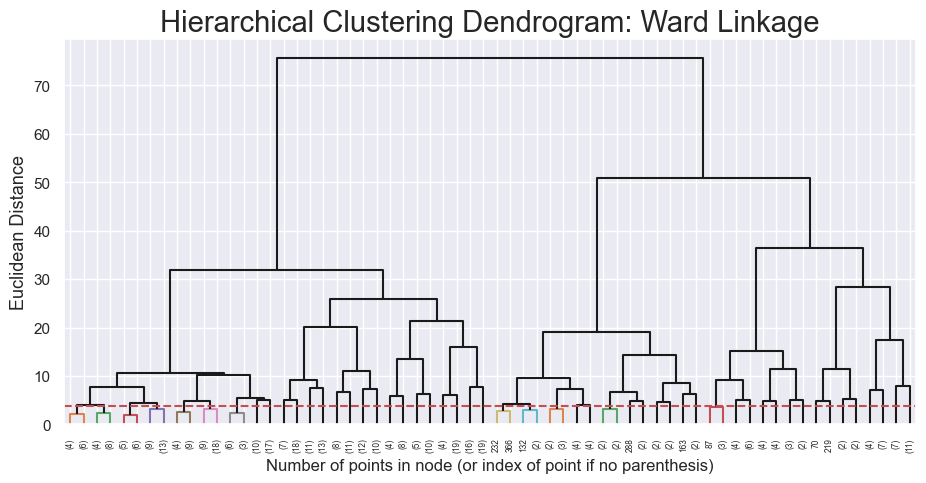

In [66]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3.7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Test Cluster Solution

In [67]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 4

hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_culinary)


In [68]:
df_clusters_concat = pd.concat([df_selected_4, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
KM_labels,,,,,
0,-0.467755,-0.526763,-0.325218,0.680107,-0.724614
1,-0.182644,4.347565,-0.507661,-0.121961,2.603390
2,-0.127692,0.947140,1.365614,1.983469,1.023685
3,-0.559880,-0.185672,-0.055248,-0.121961,-0.458064
4,0.841636,-0.598858,-0.508120,-0.121961,-0.095830
...,...,...,...,...,...
395,0.243039,-0.096576,-0.494071,1.482176,-0.096176
396,-0.292208,-0.296389,0.717763,3.086313,-0.115255
397,0.725464,0.135871,-0.090403,2.284245,0.468614


In [69]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary4 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc4_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary4.rename(columns={0:'HC_label'},inplace=True)

In [70]:
kmhc_culinary4.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,-0.062074,-0.072648,-0.043103,-0.028447,-0.097959
1,0.683302,5.727647,0.290856,0.986700,4.280482
2,0.934932,0.754243,6.955568,1.454987,3.412456
3,5.586601,1.451125,-0.026788,1.166656,4.106403


In [71]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_culinary)


In [72]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary3 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc3_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary3.rename(columns={0:'HC_label'},inplace=True)

In [73]:
kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,3.043828,3.668861,0.137937,1.073334,4.196678
1,-0.062074,-0.072648,-0.043103,-0.028447,-0.097959
2,0.934932,0.754243,6.955568,1.454987,3.412456


In [74]:
# See crosstab 

pd.crosstab(kmhc_culinary4['HC_label'], kmhc_culinary3['HC_label'])

HC_label,0,1,2
HC_label,,,
0,0,30371,0
1,293,0,0
2,0,0,177
3,272,0,0


Based on the dendrogram, dividing the customers into 3 clusters appears to be a better choice than dividing them into 4. Additionally, when splitting into 4 clusters, there are no significant differences between clusters 1 and 3, making the extra division less meaningful. Therefore, we have decided to group the customers into 3 clusters to ensure a more effective and interpretable segmentation.

### Final Hierarchical clustering solution

In [75]:
kmhc_culinary_final= kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_culinary_final

,tot_western_cuisines,tot_oriental_cuisines,tot_other_cuisines,purchased_cuisines,tot_CUI
HC_label,,,,,
0,3.043828,3.668861,0.137937,1.073334,4.196678
1,-0.062074,-0.072648,-0.043103,-0.028447,-0.097959
2,0.934932,0.754243,6.955568,1.454987,3.412456


- Cluster 0: This cluster represents customers who order a large volume of food but tend to spend relatively little on any specific type of cuisine. This suggests they are likely opting for cheaper options.
- Cluster 1: This cluster represents customers with low overall consumption of cuisines, who also prefer cheaper options. They appear to be low-engagement customers who make infrequent purchases, likely with undefined gastronomic preferences or occasional consumption patterns.
- Cluster 2: This cluster consists of customers who spend significantly on oriental cuisine, with very high values in this category. They also consume a relatively low amount of western cuisine and have minimal spending on other types of cuisine. However, they purchase from a relatively high number of different cuisines.


<div class="alert alert-block alert-success">
<a class="anchor" id="section_4">
    
# 4. K-Means Clustering
    
</a>
<div>

In [76]:

from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [77]:
kmclust = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
kmclust.fit(df[metric_features])
kmclust.predict(df[metric_features])

NameError: name 'metric_features' is not defined

In [ ]:
# Different initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

In [ ]:
kmclust.predict(df[metric_features])

### Inertia Method

In [ ]:
# Column groups
groups = {
    'Customer_perfil': Customer_perfil,
    'Purchasing_patterns': Purchasing_patterns,
    'Customer_behavior': Customer_behavior,
    'Culinary_preferences': Culinary_preferences
}

for group_name, columns in groups.items():
    inertia = []
    range_clusters = range(1,11)
    for n_clus in range_clusters:  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='random', n_init=15, random_state=1)
        kmclust.fit(df[Customer_perfil])
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    
    # Do the plot

    fig, ax = plt.subplots(figsize=(9,5))

    ax.plot(range_clusters, inertia)
    ax.set_xticks(range_clusters)
    ax.set_ylabel("Inertia: SSw")
    ax.set_xlabel("Number of clusters")
    ax.set_title(f"Inertia plot over clusters for {group_name}", size=15)

    plt.show()

After analyzing all the plots, we firmly conclude that the optimal number of clusters across all groups lies between three and four, with a strong preference for **four**. To confirm this, we tested various parameters for Customer_perfil to see if there was any improvement.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Variables to store results
results = []
range_clusters = range(1, 11)  # Range of clusters to test

# Lists of parameters to test
inits = ['random', 'k-means++']
n_inits = [10, 15, 20]
max_iters = [100, 200]

# Loop to iterate over different parameters
for init_method in inits:
    for n_init_val in n_inits:
        for max_iter_val in max_iters:
            inertia = []  # List to store inertia values for different clusters
            for n_clus in range_clusters:
                # Create and fit the KMeans model
                kmclust = KMeans(
                    n_clusters=n_clus,
                    init=init_method,
                    n_init=n_init_val,
                    max_iter=max_iter_val,
                    random_state=1
                )
                kmclust.fit(df[Customer_perfil])
                inertia.append(kmclust.inertia_)  # Save the inertia
                
            # Save the results in a list
            results.append({
                'init': init_method,
                'n_init': n_init_val,
                'max_iter': max_iter_val,
                'inertia': inertia
            })

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the inertia curves for each combination of parameters
for result in results:
    label = f"Init: {result['init']}, n_init: {result['n_init']}, max_iter: {result['max_iter']}"
    ax.plot(range_clusters, result['inertia'], label=label)

ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters for Customer_perfil with different parameters", size=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()


After analyzing the graphic, we conclude that other parameters did not influence our choice for the number of clusters, which remains at **four**.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Column groups
groups = {
    'Customer_perfil': Customer_perfil,
    'Purchasing_patterns': Purchasing_patterns,
    'Customer_behavior': Customer_behavior,
    'Culinary_preferences': Culinary_preferences
}

# Dictionary to store the results
kmeans_results = {}

# Loop to apply KMeans separately for each group
for group_name, columns in groups.items():
    print(f"Processing group: {group_name}")
    
    # Scaled data for the current group
    data_scaled = df[columns]
    
    # 1. Determine the optimal number of clusters using the elbow method
    inertia = []
    range_clusters = range(1, 11)  # Test between 1 and 10 clusters
    for n_clusters in range_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=1)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)
    
    # 2. Elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, inertia, marker='o')
    plt.title(f'Elbow Method for {group_name}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    # 3. Choose the optimal number of clusters manually (based on the plot)
    n_clusters = int(input(f"Enter the number of clusters for {group_name}: "))
    
    # 4. Fit KMeans with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    kmeans.fit(data_scaled)
    
    # Save the labels and centroids
    kmeans_results[group_name] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_
    }
    
    # Add the labels as a new column in the original DataFrame
    df[f'{group_name}_Cluster'] = kmeans.labels_

    print(f"Clusters for {group_name} added to DataFrame as '{group_name}_Cluster'.")

# Display the first few rows of the updated DataFrame
print(df.head())


In [ ]:
def apply_kmeans(df, features, n_clusters=4): # defining 4 for the number of clusters (explain above)
    X = df[features]
    
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df[f'{features[0]}_cluster'] = kmeans.fit_predict(X)  # Cluster name based on the first variable in the set

    # Cluster summary (mean features by cluster)
    cluster_summary = df.groupby(f'{features[0]}_cluster')[features].mean()
    print(f"Cluster Summary for {features[0]}:")
    print(cluster_summary)
    
    # Visualize cluster distribution
    plt.figure(figsize=(8, 6))
    df[f'{features[0]}_cluster'].value_counts().plot(kind='bar')
    plt.title(f'Cluster Distribution - {features[0]}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=0)
    plt.show()

    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df[f'{features[0]}_cluster'], cmap='viridis')
    plt.title(f'Customer Clusters ({features[0]}) - PCA 2D')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Apply KMeans for each group of variables
apply_kmeans(df, Customer_perfil)
apply_kmeans(df, Purchasing_patterns)
apply_kmeans(df, Customer_behavior)
apply_kmeans(df, Culinary_preferences)



nao meti nada do visualize cluster  e comparar clusters means

<div class="alert alert-block alert-success">
<a class="anchor" id="section_5">
    
# 5. Self-Organization Maps
    
</a>
<div>

## Purpose of Self-Organizing Maps (SOM)

Self-Organizing Maps (SOM) serve as a powerful data visualization technique designed to interpret and simplify high-dimensional data. By reducing the dimensionality of the data, SOM maps complex relationships into a 2D grid, making it easier to understand patterns and structures.

### Key Features of SOM:
- **Dimensionality Reduction**: 
  - SOM simplifies high-dimensional data by mapping it onto a lower-dimensional space while preserving the relationships and similarities among data points.
  
- **Clustering Representation**: 
  - It inherently groups similar data points together, visualizing clusters and highlighting natural groupings within the dataset.



In [250]:
d1=df_selected_1.values
d2=df_selected_2.values
d3=df_selected_3.values
d4=df_selected_4.values

In [251]:
# Applying SOM to Each Group Separately
som_customer_perfil = MiniSom(x=10, y=10, input_len=d1.shape[1], sigma=1.0, learning_rate=0.5)
som_customer_perfil.random_weights_init(d1)
som_customer_perfil.train_random(d1, num_iteration=100)

som_purchasing_patterns = MiniSom(x=10, y=10, input_len=d2.shape[1], sigma=1.0, learning_rate=0.5)
som_purchasing_patterns.random_weights_init(d2)
som_purchasing_patterns.train_random(d2, num_iteration=100)

som_customer_behavior = MiniSom(x=10, y=10, input_len=d3.shape[1], sigma=1.0, learning_rate=0.5)
som_customer_behavior.random_weights_init(d3)
som_customer_behavior.train_random(d3, num_iteration=100)

som_culinary_preferences = MiniSom(x=10, y=10, input_len=d4.shape[1], sigma=1.0, learning_rate=0.5)
som_culinary_preferences.random_weights_init(d4)
som_culinary_preferences.train_random(d4, num_iteration=100)


## Self-Organizing Map (SOM) Grid Configuration

SOM organizes data in an **unsupervised manner**, mapping it onto a grid of predefined dimensions. This grid enables the grouping of similar data points into clusters.

###  Setting the SOM Grid Dimensions
The size of the grid is a crucial parameter, as it defines the number of potential "clusters" in the map. 

#### Heuristic Rule for Grid Dimensions:
The optimal grid size can be determined using the following formula:

\[
\text{Grid Dimension} = \sqrt{5 \times \sqrt{N}}
\]

Where **N** is the total number of data points in the dataset.

![image-2.png](attachment:image-2.png) 

In [252]:
from pylab import bone, pcolor, colorbar, plot, show, contour
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np

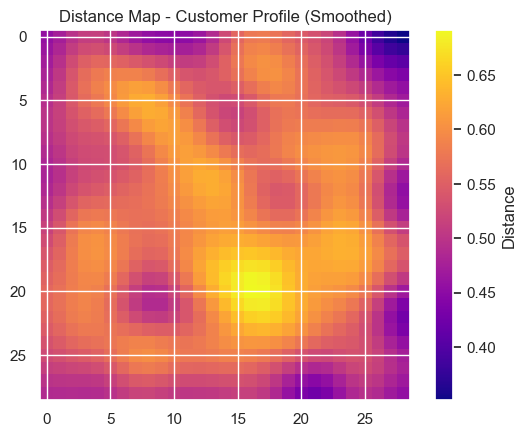

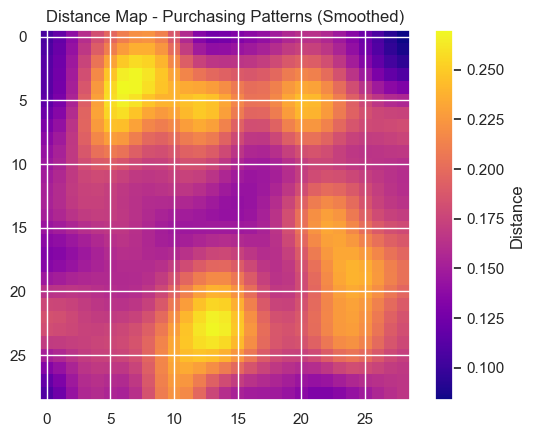

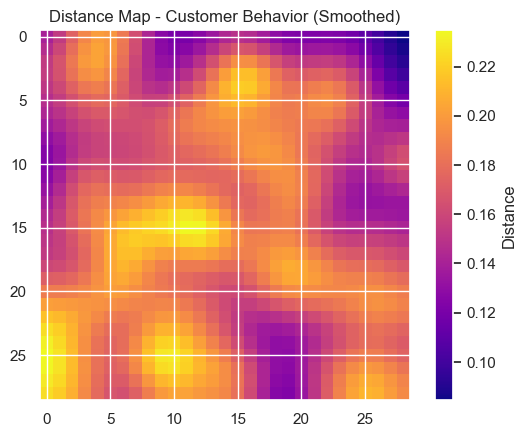

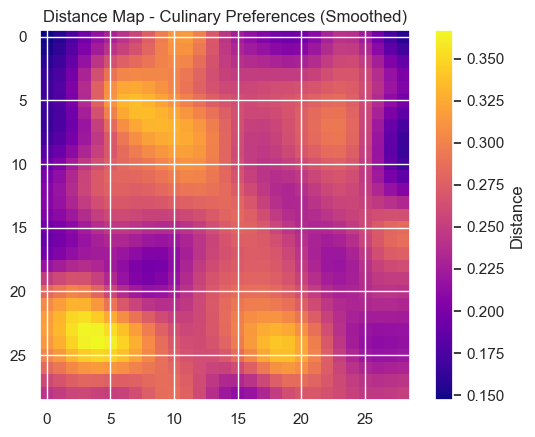

In [253]:
# Function to Train and Visualize SOM for Each Group

def train_and_visualize_som(data_scaled, group_name):

    # Adjusting the SOM
    grid_size = int(np.sqrt(5 * np.sqrt(data_scaled.shape[0])))
    som = MiniSom(x=grid_size, y=grid_size, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(data_scaled)
    som.train_random(data=data_scaled, num_iteration=200)

    # Visualization of the Distance Map
    bone()
    distance_map = som.distance_map().T

    smoothed = gaussian_filter(distance_map, sigma=2)

    plt.imshow(smoothed, cmap='plasma', interpolation='nearest')  
    plt.colorbar(label='Distance')
    plt.title(f'Distance Map - {group_name} (Smoothed)')
    plt.show()

    return som

# Apply to each group
som_customer_perfil = train_and_visualize_som(d1, "Customer Profile")
som_purchasing_patterns = train_and_visualize_som(d2, "Purchasing Patterns")
som_customer_behavior = train_and_visualize_som(d3, "Customer Behavior")
som_culinary_preferences = train_and_visualize_som(d4, "Culinary Preferences")


### Analysis of Distance Maps for Metric Categories

Using the generated code, Distance Maps were created to show the average distances between the weights of neighboring neurons on the SOM grid for each of the four metric categories analyzed. The intensity of the colors in the map reflects the average distance between a specific neuron and its neighbors:

- **Lighter areas:** Indicate larger distances (less similarity), suggesting transitions between clusters or more dispersed data.
- **Darker areas:** Indicate smaller distances (greater similarity), representing natural groupings of similar data.

Regions with consistent colors point to well-defined clusters. Below is a detailed analysis for each category:

---

### 1. Customer Profile

The Distance Map for **Customer Profile** reveals:

- **Dark Central Region:**
  - Indicates a cluster with smaller distances, suggesting a homogeneous group of customers with similar profiles.
  - This central region may represent a subset of customers sharing demographic or socioeconomic characteristics.

- **Lighter Areas Surrounding It:**
  - These areas indicate greater separation or transitions to other clusters.
  - Suggests that there are well-defined boundaries around the central cluster, separating customers with distinct profiles.

This map is useful for identifying general characteristics and demographic groups based on customer profiles. Highly different profiles tend to cluster in separate areas of the map.

---

### 2. Purchasing Patterns

The Distance Map for **Purchasing Patterns** shows:

- **Well-Defined Clusters:**
  - Dark areas represent homogeneous groups of customers with consistent purchasing patterns.
  - These clusters may indicate regular consumers or customers with predictable buying behaviors.

- **Lighter Areas with High Distance:**
  - Regions with greater intensity (lighter colors) suggest more distinct clusters of purchasing patterns.
  - At least 2-3 regions of high intensity indicate subgroups of customers with behaviors significantly different from the rest.

- **Transition Areas:**
  - Intermediate regions may represent customers transitioning between different purchasing behavior categories.

This map is ideal for identifying distinct purchasing patterns, enabling more detailed segmentation, such as targeted campaigns for regular customers versus those with more unique purchasing behaviors.

---

### 3. Customer Behavior

The Distance Map for **Customer Behavior** highlights:

- **Diffuse Distribution:**
  - The map shows less contrast between lighter and darker areas, suggesting less separation between clusters.
  - Darker areas dominate the map, indicating higher similarity in the analyzed behaviors.

- **Less Cluster Separation:**
  - This may indicate that general customer behaviors vary less or that the analyzed variables do not segment the groups clearly.
  
- **Lighter Areas:**
  - Though less pronounced, these regions still represent subgroups of customers with slightly distinct behaviors.

This map suggests that customer behavior is largely homogeneous but still allows for identifying small differences between groups for specific strategies.

---

### 4. Culinary Preferences

The Distance Map for **Culinary Preferences** reflects:

- **Purple Areas (Low Distance):**
  - Represent consumers with similar culinary preferences.
  - Can be used to create segmented campaigns, such as promotions for specific dishes or personalized menus.

- **Yellow Areas (High Distance):**
  - Indicate consumers with unique or divergent culinary preferences.
  - These insights can help identify market niches or develop innovative products to cater to these specific preferences.

This map is valuable for identifying both homogeneous clusters and consumers with unique culinary characteristics, enabling targeted and innovative strategies.





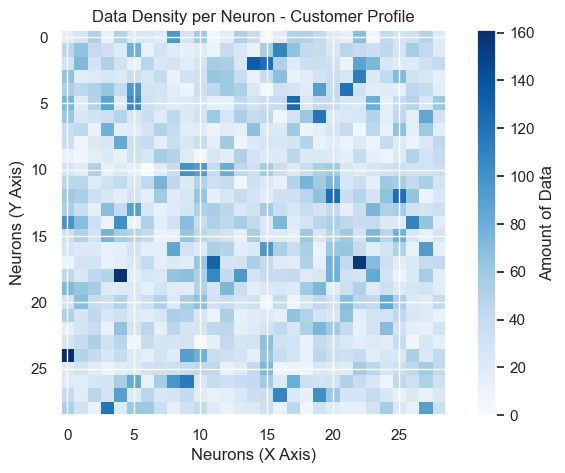

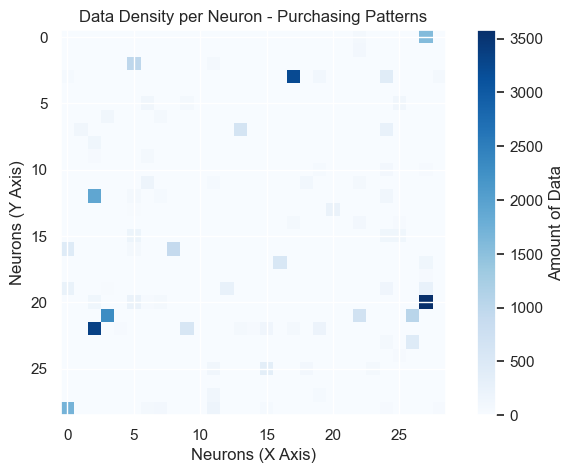

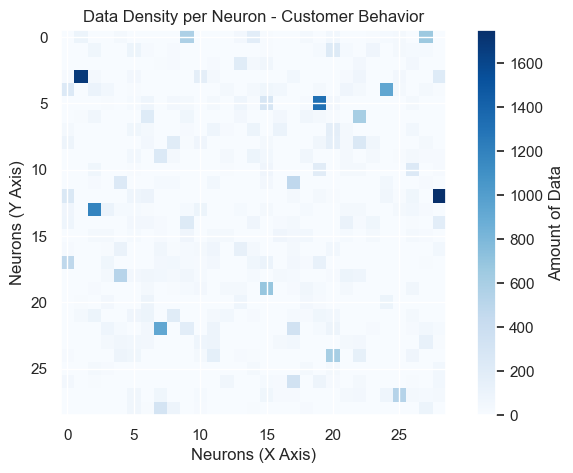

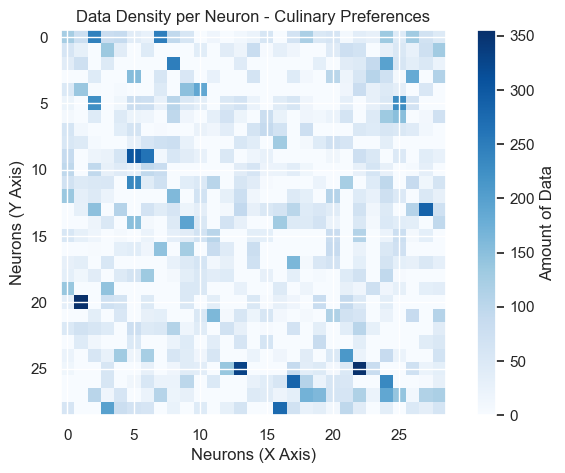

In [254]:
# Density plot for each group
def plot_density(som, data_scaled, group_name):
    activation_map = som.activation_response(data_scaled)
    plt.figure(figsize=(8, 5))
    plt.title(f'Data Density per Neuron - {group_name}')
    plt.imshow(activation_map, cmap='Blues', interpolation='nearest')
    plt.colorbar(label='Amount of Data')
    plt.xlabel('Neurons (X Axis)')
    plt.ylabel('Neurons (Y Axis)')
    plt.show()

plot_density(som_customer_perfil, d1, "Customer Profile")
plot_density(som_purchasing_patterns, d2, "Purchasing Patterns")
plot_density(som_customer_behavior, d3, "Customer Behavior")
plot_density(som_culinary_preferences, d4, "Culinary Preferences")


Density maps provide a visual analysis of data distribution within the Self-Organizing Map (SOM). Darker colors indicate high data concentration in specific neurons, forming clusters that represent groups with similar characteristics, while lighter colors highlight low-density areas associated with less frequent patterns or outliers. Each map helps identify specific patterns within the data and provides valuable insights for developing targeted strategies.

### Summary Analysis:

##### Customer Profile: 
The map shows well-defined clusters representing similar customer profiles grouped into specific neurons. Low-density areas suggest unique or less common profiles. This analysis is essential for segmenting customers into primary groups and personalizing marketing campaigns based on predominant characteristics.

---

##### Purchasing Patterns: 
Key clusters highlight recurring purchasing behaviors, such as preferences for specific products or regular consumption patterns. Low-density regions reflect unique behaviors or niche markets. High-density areas can be leveraged for volume-driven strategies, while less dense regions represent opportunities to understand and cater to customers with differentiated preferences.


---


##### Customer Behavior: 
This map highlights clusters of high density, such as around neuron (20, 25), indicating frequent and significant behavioral patterns in the data. Light zones suggest rarer or less representative behaviors. This analysis is useful for understanding the main behaviors that define customers and adjusting segmentation and retention strategies accordingly.

---

##### Culinary Preferences:
 The distribution in this map is more dispersed, with moderate density in various areas and some higher concentrations around neurons (5, 20) and (15, 10). Clusters indicate common culinary preferences, while low-density areas reflect diverse or rare tastes. These insights can guide the creation of personalized offers, such as tailored menus or campaigns targeting specific groups.


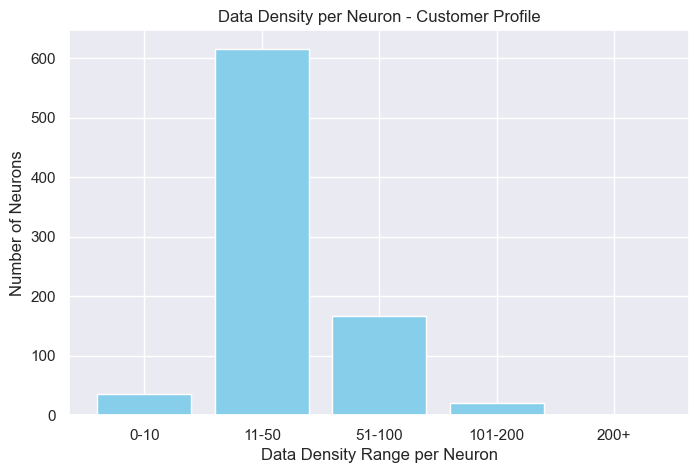

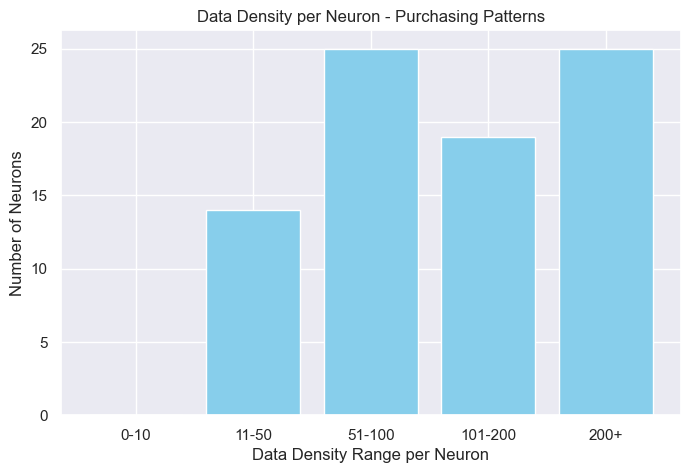

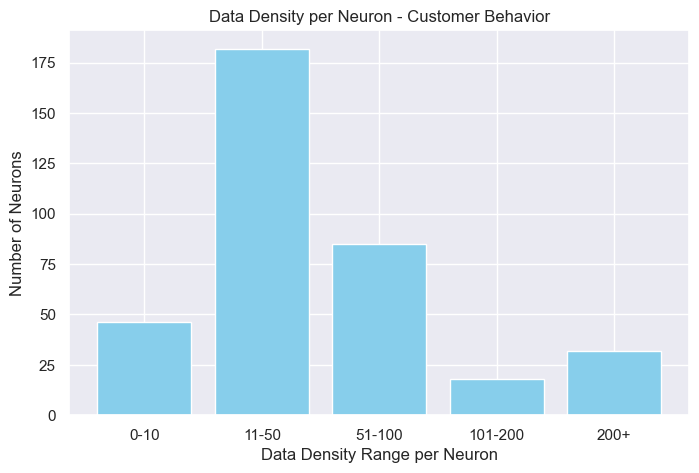

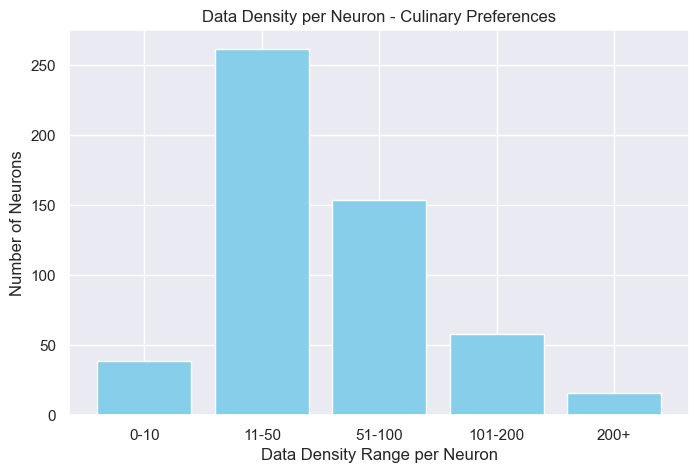

In [255]:
#Function to calculate and plot density bins
def plot_density_bins(som, scaled_data, group_name):
    # Calculate the activation map
    activation_map = som.activation_response(scaled_data)
    
    # Define the density ranges
    density_bins = [0, 10, 50, 100, 200, activation_map.max() + 1]
    density_labels = ['0-10', '11-50', '51-100', '101-200', '200+']
    density_groups = {label: 0 for label in density_labels}
    
    # Count the frequency of neurons in each range
    for count in activation_map.flatten():
        for i, (low, high) in enumerate(zip(density_bins[:-1], density_bins[1:])):
            if low < count <= high:
                density_groups[density_labels[i]] += 1
    
    # Plot the density bins
    plt.figure(figsize=(8, 5))
    plt.bar(density_groups.keys(), density_groups.values(), color='skyblue')
    plt.xlabel('Data Density Range per Neuron')
    plt.ylabel('Number of Neurons')
    plt.title(f'Data Density per Neuron - {group_name}')
    plt.show()

# Apply to each group
plot_density_bins(som_customer_perfil, d1, "Customer Profile")
plot_density_bins(som_purchasing_patterns, d2, "Purchasing Patterns")
plot_density_bins(som_customer_behavior,d3, "Customer Behavior")
plot_density_bins(som_culinary_preferences,d4, "Culinary Preferences")


### Data Density Analysis per Neuron in SOMs

This report analyzes the distribution of data density across neurons in self-organizing maps (SOMs) for various datasets: **Culinary Preferences**, **Purchasing Patterns**, and **Customer Behavior**. Data density is categorized into predefined intervals: `0-10`, `11-50`, `51-100`, `101-200`, and `200+`, representing the number of data points mapped to each neuron.

---

### 1. Culinary Preferences
- **Dominant interval**: `11-50` (more than 600 neurons).
  - Indicates that most neurons capture a moderate density of data.
  - Suggests reasonably consistent customer profiles across the map.
  - This balanced distribution facilitates the identification of meaningful clusters.
- **Second most represented interval**: `51-100` (~150 neurons).
  - Captures denser patterns, likely corresponding to specific culinary preferences, such as affinity for a particular type of cuisine or food category.
- **Sparse interval (`0-10`)**: Few neurons fall into this range, representing rare or outlier data points.
  - These areas may indicate uncommon customer profiles or niche patterns.
  - Could be an opportunity to explore underrepresented customer segments for new strategies or campaigns.
.

---

### 2. Purchasing Patterns
- **Dominant intervals**:
  - `51-100`: Represents a moderately dense group of neurons, capturing balanced patterns in the data.
  - `200+`: Significant concentration of data in a few neurons, possibly indicating overfitting or the presence of highly distinct patterns.
- **Key Observations**:
  - The coexistence of moderately dense (`51-100`) and highly dense (`200+`) neurons suggests two primary customer groups:
    1. Customers with balanced purchasing behaviors.
    2. Customers with highly concentrated or distinct purchasing patterns.
  - Overrepresentation in `200+` might point to the need for further fine-tuning of the SOM parameters to ensure better data spread.


---

### 3. Customer Behavior
- **Dominant interval**: `11-50` (~175 neurons).
  - Indicates uniform data distribution across neurons, reflecting representative patterns without overloading specific neurons.
  - Likely corresponds to common and consistent customer behaviors, such as regular purchasing frequency or steady interactions.
- **Secondary interval**: `51-100` (~75 neurons).
  - Represents denser patterns, possibly linked to customers with more complex or varied behaviors.
  - These neurons might highlight higher-value customers or those with retention potential.
- **Sparse intervals (`0-10` and `200+`)**:
  - Few neurons fall into these categories, suggesting that extreme outliers and highly concentrated patterns are rare.

---

### 4. Culinary Preferences
- **Dominant interval**: `11-50` (over 300 neurons).
  - Indicates a uniform distribution of data, reflecting well-represented customer profiles across the map.
- **Secondary interval**: `51-100` (~150 neurons).
  - Represents denser patterns, potentially linked to specific culinary preferences, such as affinity for certain cuisines or food categories.





<div class="alert alert-block alert-success">
<a class="anchor" id="section_6">
    
# 6. DBSCAN
    
</a>
<div>

In [256]:
def neighbors_dist (df, n_neighbors):
    """
    Plots the distance to the nearest neighbors for a dataset.

    This function uses the `NearestNeighbors` algorithm from the `sklearn` library to compute the distance to the nearest neighbors of each point in the provided dataset. 
    The resulting plot helps identify the density of the data based on the distance between points, which can be useful for determining an appropriate value for the `min_pts`
    parameter (minimum number of points) in methods like DBSCAN.

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset with points for which the distances to the nearest neighbors will be computed.
        Each row represents a point, and each column represents a feature (or dimension).
    
    n_neighbors : int
        The number of neighbors to consider for each point. It is typically a multiple of the number of features in the dataset (e.g., 2 * number of features).
    """

    # Initialize the NearestNeighbors algorithm
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    
    # Fit the model and compute the distances and indices
    neighbors.fit(df)
    distances, _ = neighbors.kneighbors(df)
    
    # Sort the distances and exclude the last column (which is always the point itself)
    distances = np.sort(distances[:, -1])
    # Plot the sorted distances
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance to nearest neighbor")
    plt.title(f"Distance to {n_neighbors} Nearest Neighbors")
    plt.show()


In [257]:
def perform_dbscan_labels(df, eps, min_samples, n_jobs=4):
    """
    Performs DBSCAN clustering on the provided dataset and returns the cluster labels.

    This function applies the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
    algorithm to a dataset, which groups points into clusters based on their density. 
    It returns the labels of the clusters, where each point is assigned a label indicating its cluster 
    (or -1 for noise points).

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset on which DBSCAN clustering will be performed. Each row represents a data point, 
        and each column represents a feature (or dimension).
    
    eps : float
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    
    min_samples : int
        The number of samples in a neighborhood for a point to be considered as a core point. 
        This is also the minimum number of points required to form a dense region (cluster).
    
    n_jobs : int
        The number of CPU cores to use during the computation. If -1, all cores are used.

    Returns:
    --------
    dbscan_labels : numpy.ndarray
        An array containing the labels for each point. Points that are part of a cluster are assigned 
        a non-negative integer label, while noise points are labeled as -1.
    
    """
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
    dbscan_labels = dbscan.fit_predict(df)
    
    # Return the cluster labels
    return dbscan_labels




In [258]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

<div >
<a class="anchor" id="section_6_1">
    
## 6.1 Customer Perfil Perspective
    
</a>
<div>

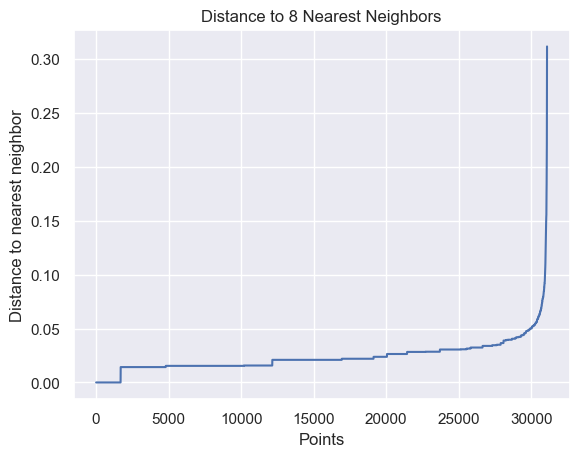

In [259]:
neighbors_dist(df_selected_1,8) # n_neighbors = 2* nº metric features (min_pts)

In [260]:
dbscan_labels= perform_dbscan_labels(df_selected_1,0.05,8,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [261]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_1, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,customer_age,first_order,last_order,dif_order,dbscan_labels
customer_id,,,,,
1b8f824d5e,0.046154,0.0,0.011111,0.205357,0
5d272b9dcb,0.030769,0.0,0.011111,0.205357,0
f6d1b2ba63,0.353846,0.0,0.011111,0.205357,0
180c632ed8,0.169231,0.0,0.022222,0.214286,0
4eb37a6705,0.076923,0.0,0.022222,0.214286,0


In [262]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,customer_age,first_order,last_order,dif_order,dbscan_labels
customer_id,,,,,
f49ed5489a,0.553846,0.000000,0.044444,0.232143,-1
eb13ad08ad,0.492308,0.000000,0.055556,0.241071,-1
b92ab1eeec,0.492308,0.000000,0.066667,0.250000,-1
afc96f7eaa,0.415385,0.000000,0.111111,0.285714,-1
9aadcc2e76,0.353846,0.000000,0.133333,0.303571,-1
...,...,...,...,...,...
20c90aaf32,0.615385,0.244444,0.000000,0.000000,-1
4ff94a6987,0.692308,0.244444,0.000000,0.000000,-1
78c778a850,0.430769,0.244444,0.000000,0.000000,-1


In [263]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_1)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0407


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\3396358789.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [264]:
df_concat.groupby('dbscan_labels').mean()

,customer_age,first_order,last_order,dif_order
dbscan_labels,,,,
-1,0.556903,0.346254,0.666884,0.454077
0,0.184238,0.322001,0.705065,0.504247
1,0.442308,0.011111,0.533333,0.616071
2,0.503297,0.184127,0.777778,0.673469
3,0.459615,0.348611,0.644444,0.434152
4,0.436538,0.545833,0.761111,0.369420
5,0.192154,0.244444,0.000000,0.000000


<div >
<a class="anchor" id="section_6_2">
    
## 6.2  Purchasing Patterns Perspective
    
</a>
<div>

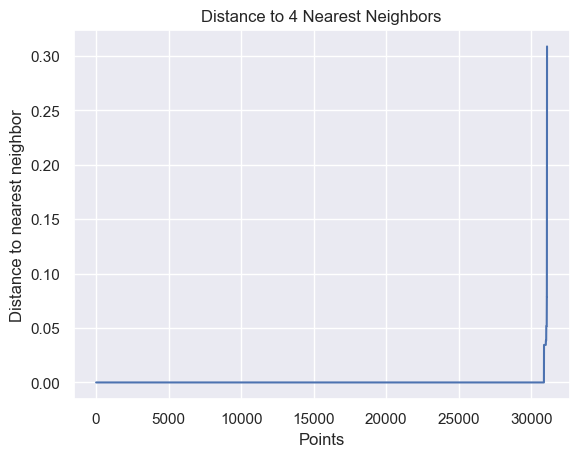

In [265]:
neighbors_dist(df_selected_2,4) # n_neighbors = 2* nº metric features (min_pts)

In [266]:
dbscan_labels= perform_dbscan_labels(df_selected_2,0.05,4,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [267]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_2, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,tot_work_days,tot_leisure_days,dbscan_labels
customer_id,,,
1b8f824d5e,0.000000,0.068966,0
5d272b9dcb,0.000000,0.068966,0
f6d1b2ba63,0.000000,0.068966,0
180c632ed8,0.038462,0.034483,0
4eb37a6705,0.038462,0.034483,0


In [268]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,tot_work_days,tot_leisure_days,dbscan_labels
customer_id,,,
eb4664b1ac,0.307692,0.586207,-1
36269ce6f1,0.576923,0.517241,-1
be810296f1,0.307692,0.965517,-1
4a973fe7df,0.076923,0.827586,-1
bdea2df96b,0.384615,0.620690,-1
e5fb8d261a,0.769231,0.758621,-1
89ebb923a9,0.846154,0.655172,-1
9fe492b40e,0.576923,0.758621,-1
63051af585,0.923077,0.586207,-1


In [269]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_2)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0770


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\3837483258.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


<div >
<a class="anchor" id="section_6_3">
    
## 6.3  Customer Behavior Perspective
    
</a>
<div>

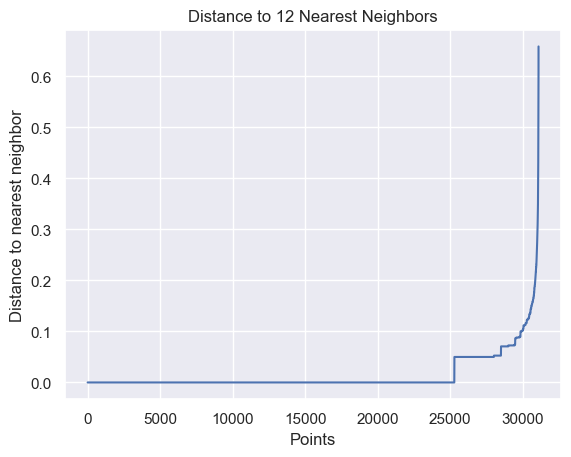

In [270]:
neighbors_dist(df_selected_3,12)

In [271]:
dbscan_labels= perform_dbscan_labels(df_selected_3,0.1,12,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 6


In [272]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_3, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,dbscan_labels
customer_id,,,,,,,
1b8f824d5e,0.0,0.00,0.000000,0.0,0.1,0.0,0
5d272b9dcb,0.0,0.05,0.052632,0.0,0.0,0.0,0
f6d1b2ba63,0.0,0.05,0.052632,0.0,0.0,0.0,0
180c632ed8,0.0,0.00,0.105263,0.0,0.0,0.0,0
4eb37a6705,0.0,0.10,0.000000,0.0,0.0,0.0,0


In [273]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night,dbscan_labels
customer_id,,,,,,,
9c5d8d6747,0.000000,0.00,0.315789,0.10,0.75,0.000,-1
a5347d72ea,0.105263,0.00,0.052632,0.05,0.00,0.500,-1
4d43db4f0a,0.000000,0.05,0.789474,0.15,0.10,0.000,-1
4a23e440a8,0.000000,0.00,0.000000,0.00,0.25,0.375,-1
d6e5be6382,0.000000,0.00,0.210526,0.30,0.45,0.250,-1
...,...,...,...,...,...,...,...
fbf93610a0,0.000000,0.05,0.000000,0.05,0.40,0.500,-1
fc2816f615,0.000000,0.25,0.526316,0.15,0.05,0.000,-1
77f20ddff6,0.368421,0.00,0.000000,0.00,0.05,0.125,-1


In [274]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3363


C:\Users\rcouc\AppData\Local\Temp\ipykernel_6000\1130391443.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [275]:
df_concat.groupby('dbscan_labels').mean()

,tot_early_morning,tot_breakfast,tot_lunch,tot_afternoon,tot_dinner,tot_late_night
dbscan_labels,,,,,,
-1,0.081294,0.188615,0.266551,0.193278,0.173320,0.098765
0,0.019918,0.034680,0.048322,0.043959,0.030247,0.000000
1,0.022639,0.026190,0.045195,0.027322,0.048283,0.125000
2,0.022556,0.008163,0.032223,0.015306,0.059184,0.375000
3,0.019825,0.024215,0.035166,0.026457,0.051121,0.250000
4,0.024561,0.020000,0.021053,0.013333,0.040000,0.500000


<div >
<a class="anchor" id="section_6_4">
    
## 6.4  Culinary Preferences Perspective
    
</a>
<div>

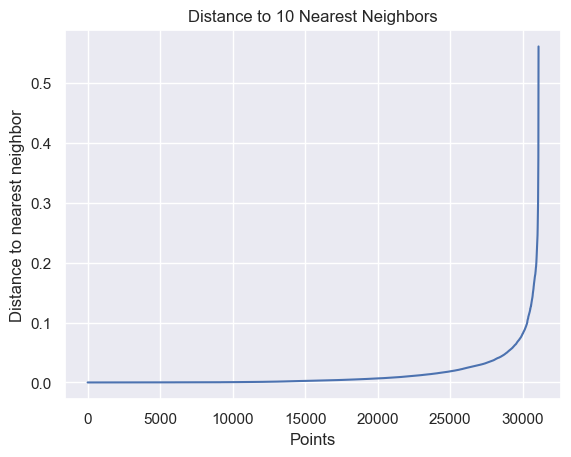

In [276]:
neighbors_dist(df_selected_4,10)

In [277]:
dbscan_labels= perform_dbscan_labels(df_selected_4,0.5,10,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

KeyboardInterrupt: 

In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_4, pd.Series(dbscan_labels, index=df_clusters.index, name="dbscan_labels")], axis=1)
df_concat.head()

In [ ]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

<div class="alert alert-block alert-success">
<a class="anchor" id="section_7">
    
# 7. MeanShift Clustering
    
</a>
<div>

In [11]:
#libraries
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth



In [17]:
from sklearn.cluster import estimate_bandwidth, MeanShift
from sklearn.metrics import silhouette_score
import numpy as np

def find_best_quantile(df, quantile_range=np.arange(0.1, 0.5, 0.05), random_state=1):
    """
    Finds the best quantile for Mean Shift clustering on a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        quantile_range (array): Range of quantile values to test.
        random_state (int): Seed for reproducibility in bandwidth estimation.

    Returns:
        dict: A dictionary containing the best quantile, best score, best bandwidth, and cluster labels.
    """
    best_score = -1
    best_quantile = None
    best_bandwidth = None
    best_labels = None
    
    for quantile in quantile_range:
        # Estimate the bandwidth
        bandwidth = estimate_bandwidth(df, quantile=quantile, random_state=random_state, n_jobs=-1)
        
        # Perform Mean Shift clustering
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
        labels = ms.fit_predict(df)
        
        # Evaluate the clustering quality
        if len(set(labels)) > 1:  # Silhouette score is only meaningful with more than 1 cluster
            score = silhouette_score(df, labels)
            if score > best_score:
                best_score = score
                best_quantile = quantile
                best_bandwidth = bandwidth
                best_labels = labels
    
    # Return the best results
    return {
        'best_quantile': best_quantile,
        'best_score': best_score,
        'best_bandwidth': best_bandwidth,
        'best_labels': best_labels
    }


<a class="anchor" id="section_7_1">
    
## 7.1  Customer Perfil Perspective
    
</a>

In [18]:
result = find_best_quantile(df_selected_1, quantile_range=np.arange(0.1, 0.5, 0.1), random_state=42)

In [19]:
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.2
Best score: 0.477545766933908
Best bandwidth: 0.33645255614561803


In [20]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_1)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


<a class="anchor" id="section_7_2">
    
## 7.2  Purchasing Patterns Perspective
    
</a>

In [28]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.4, 0.9, 0.2), random_state=42)

In [29]:
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.7
Best score: 0.7419056478803691
Best bandwidth: 0.13284228476838528


In [30]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 6


<a class="anchor" id="section_7_3">
    
## 7.3   Customer Behavior Perspective
    
</a>

In [33]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 1.0, 0.2), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.8
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [34]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


<a class="anchor" id="section_7_4">
    
## 7.4   Culinary Preferences Perspective
    
</a>

In [35]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 0.9, 0.1), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.7999999999999999
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [36]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


<a class="anchor" id="section_7_5">
    
## 7.5  Visuallizations
    
</a>

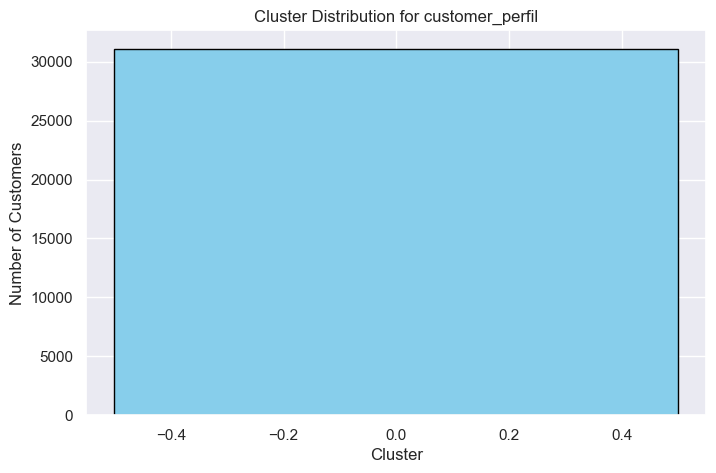

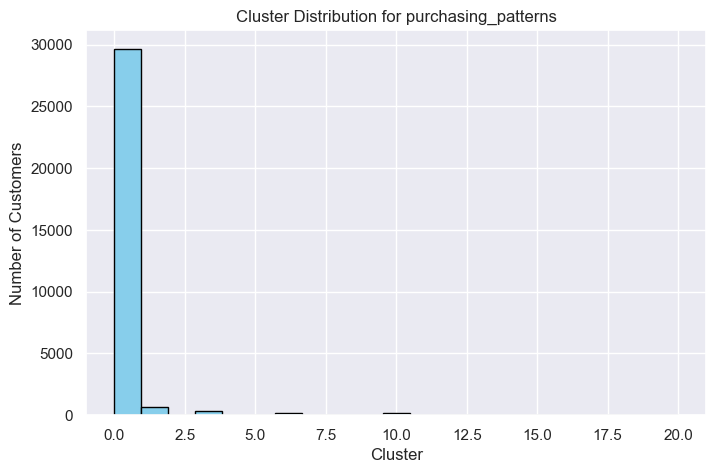

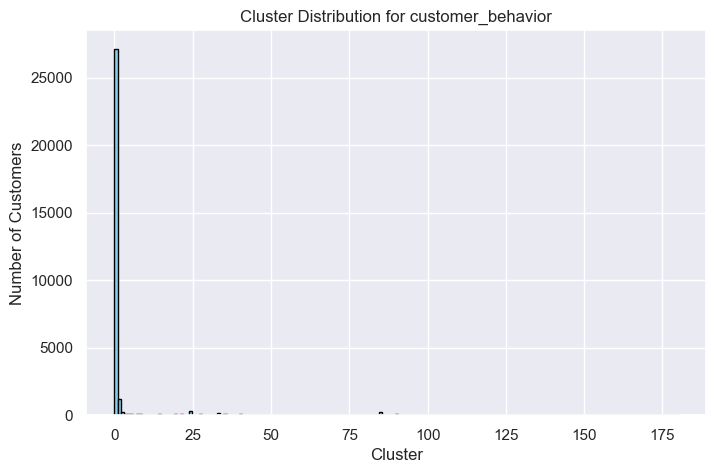

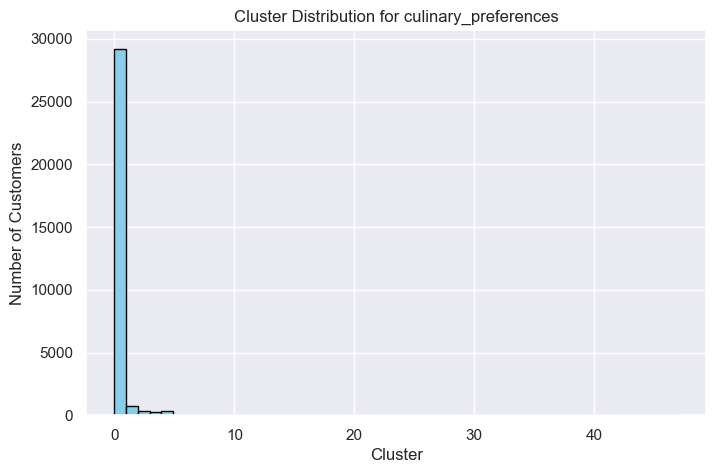

In [ ]:
for group_name in results.keys():
    plt.figure(figsize=(8, 5))
    plt.hist(results[group_name]['labels'], bins=results[group_name]['n_clusters'], color='skyblue', edgecolor='black')
    plt.title(f'Cluster Distribution for {group_name}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()


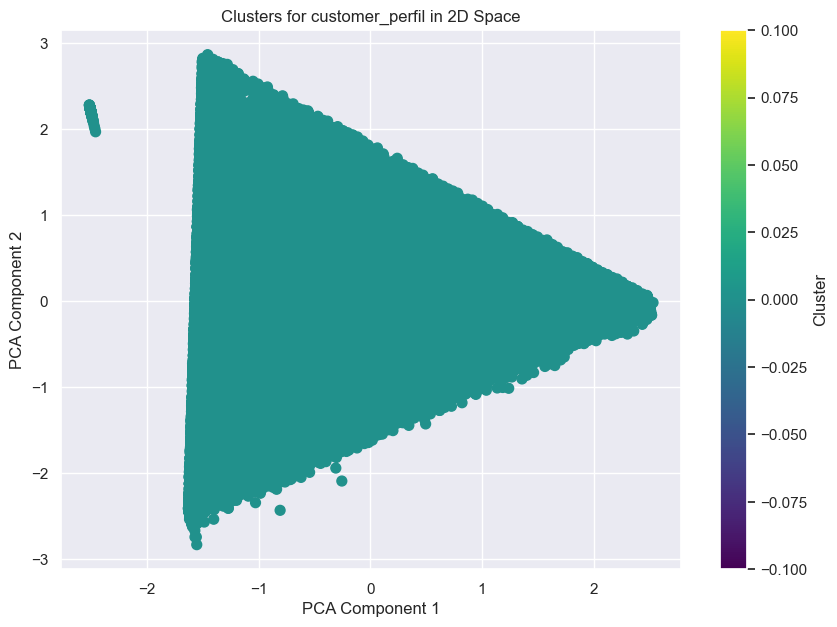

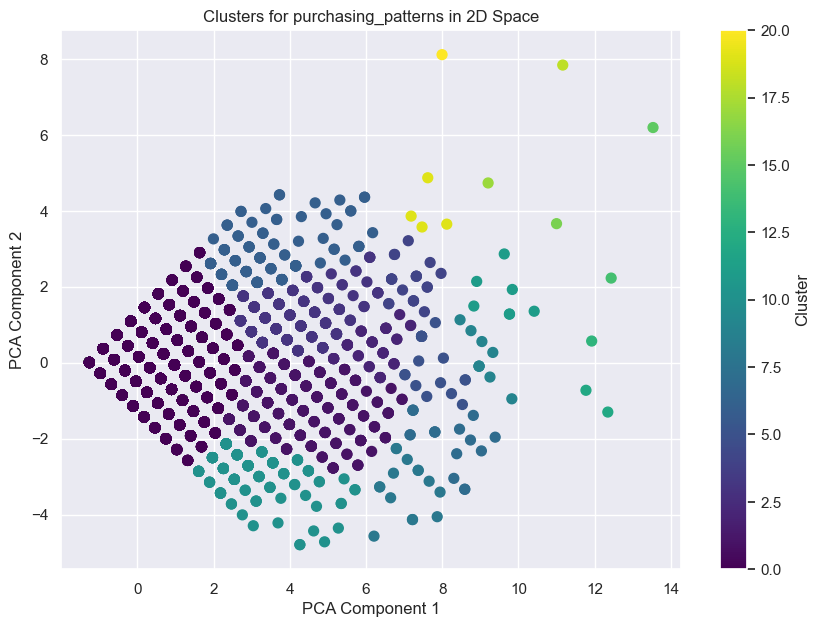

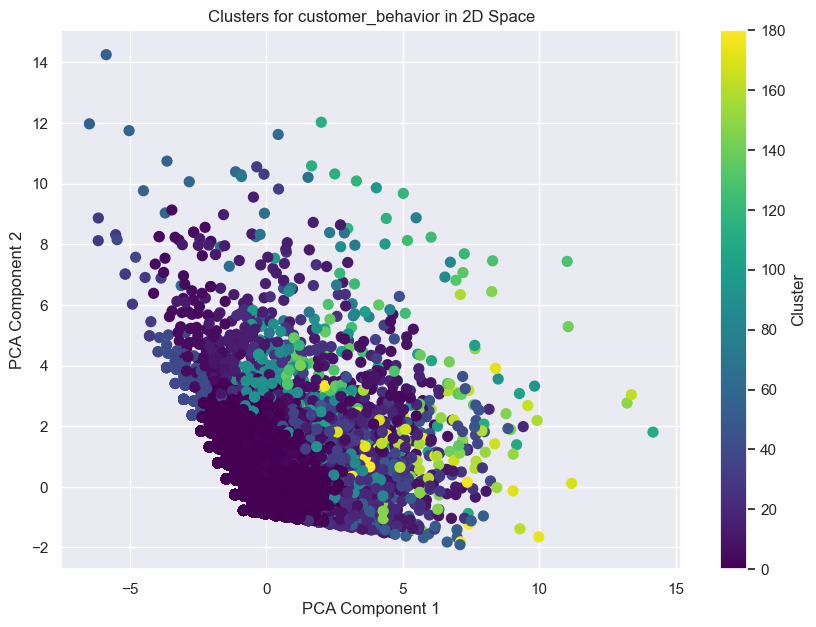

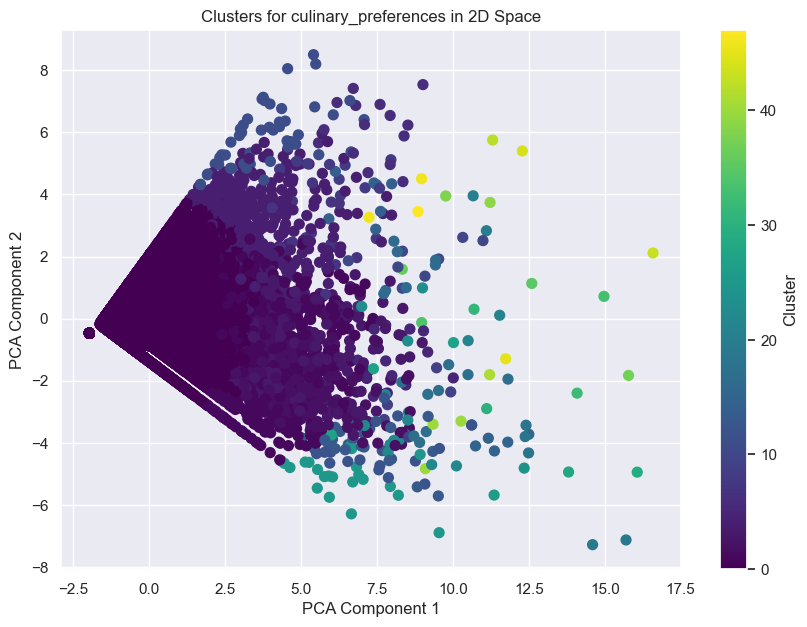

In [ ]:
from sklearn.decomposition import PCA

for group_name, features in feature_groups.items():
    # Dimensionality reduction
    data_scaled = StandardScaler().fit_transform(df[features])
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled)
    
    # Scatter plot
    plt.figure(figsize=(10, 7))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=results[group_name]['labels'], cmap='viridis', s=50)
    plt.colorbar(label='Cluster')
    plt.title(f'Clusters for {group_name} in 2D Space')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
